In [1]:
import numpy as np
import pandas as pd

# 졸음운전 Data
> 참고 blog : https://makeit.tistory.com/116
* concat(), set_index, Multiindex, groupby(), nlarge()

## 1. 3개의 데이터를 병합하시오

In [2]:
data_2014 = pd.read_csv("data/2014년 졸음운전 교통사고.csv", encoding='euc-kr')
data_2015 = pd.read_csv("data/2015년 졸음운전 교통사고.csv", encoding='euc-kr')
data_2016 = pd.read_csv("data/2016년 졸음운전 교통사고.csv", encoding='euc-kr')

data = pd.concat([data_2014, data_2015, data_2016])
data.set_index('구분', inplace=True)
data

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474
2014년6월,233,13,457
2014년7월,229,14,431
2014년8월,222,9,447
2014년9월,225,15,430


========================이후문제는 병합한 데이터프레임을 이용 ========================

## 2. 년도, 월별로 인덱스를 설정(멀티인덱스) 하고 데이터를 보여 주시오

In [15]:
ans2 = data.copy()
ans2.index = pd.to_datetime(ans2.index, format='%Y년%m월')
ans2.set_index([ans2.index.year, ans2.index.month], inplace=True)
ans2.index.names = ['년도', '월']
ans2

사고(건)  사망(명)  부상(명)
년도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

## 3. 년도 및 월별 평균 사망자를 보여주시오

In [22]:
ans3_y = ans2.groupby('년도').mean()['사망(명)']
ans3_m = ans2.groupby('월').mean()['사망(명)']
ans3_y, ans3_m

(년도
 2014    10.833333
 2015     9.000000
 2016     8.166667
 Name: 사망(명), dtype: float64,
 월
 1      6.666667
 2      5.666667
 3      7.666667
 4      7.000000
 5     13.000000
 6     11.000000
 7     10.000000
 8     11.666667
 9     12.666667
 10    12.666667
 11     6.000000
 12     8.000000
 Name: 사망(명), dtype: float64)

## 4.  2016년 사고대비 사망율을 구하시오

In [39]:
D_rate = ans2.loc[2016]['사망(명)'].sum() / ans2.loc[2016]['사고(건)'].sum()
D_rate

0.04027949034114262

## 5. 2014년도 월별 사망, 부상 데이터를 바차트로 보여주시오

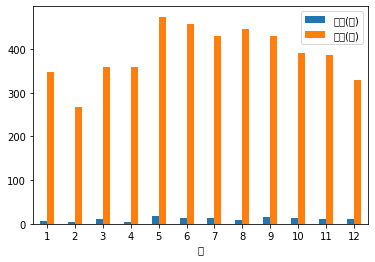

In [44]:
ans2.loc[2014][['사망(명)', '부상(명)']].plot(kind='bar', rot=0);

## 6. 2015년 대비  사망이 가장 많이 증가한 2016년도 월을 구하시오

In [58]:
(ans2.loc[2016] - ans2.loc[2015]).nlargest(1, '사망(명)', keep='all')['사망(명)']

월
5    4
6    4
Name: 사망(명), dtype: int64